# K-nearest neighbours code


The K-nearest neighbours algrorithm is often used as a baseline method as it is simple to understand. 
The method considers one nearest neighbour: it does this by finding the closest training data point to the prediction point. The prediction is then simply the known output for that data point. When considering more than one neighbour a voting system is used to assign a label. For more than one class we can count how many neighbours belong to each class and predict the most common 



In [2]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sn



In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [5]:
#read in the dataset 
dataset = pd.read_csv('framingham.csv')

In [6]:
dataset.head(10) #checking correct dataset is imported 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Use premade functions to optimise parameters before entry 

In [7]:
os.chdir('/Users/eleanorbarr/Documents/GitHub/machine-learning_CHD')

In [8]:
'''Selecting features - dropping uninteresting columns'''

def chose_features(dataset, features=dataset.columns, n_features = -1, v=1, vv =0):
    '''Return reduced dataset with only chosen columns
    - dataset: pandas dataframe of dataset to have columns chosen
    - features (optional, default = all features): list of strings matching features to keep
    - n_features (optional) - if specified, the top n features from the scaled list is chosen: 
    ['glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
        'diabetes', 'BPMeds', 'male', 'BMI', 'prevalentStroke',
        'education', 'heartRate', 'currentSmoker'],
    - v (optional) - Verbose (default 1) int 0 or 1. Print no. of features kept and lost 
    - vv (optional) - Very verbose (default 0) int 0 or 1. Print list of chosen and rejected features
    '''
                
    print('Now selecting chosen features....')
    
    if n_features != -1:
        if n_features > len(dataset.columns):
            print('WARNING: chose_features has an error: n_features must be less than no. columns')
            return(-1)
        else:
            ordered_f = ['TenYearCHD','glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI', 'sysBP','prevalentStroke',
            'education', 'heartRate', 'currentSmoker']
            features = ordered_f[0:n_features]

    if v == 1: 
        print('\t * Number of features: ', len(features))
        print('\t * Number of dropped features: ', len(dataset.columns) - len(features))
        
    if vv == 1:
        print('\t * Chosen features: ', features)
        print('\t * Dropped features: ',[col for col in dataset.columns if col not in features])
    print('')
    
    return dataset.copy()[features] #reduced dataset



'Selecting features - dropping uninteresting columns'

In [9]:
'''Dealing with missing values'''

#Method 1: Drop missing values
def drop_missing(dataset):
    '''Drop rows with any missing values and return dataset with dropped rows. Prints number and percentage of rows dropped
    - Dataset: pandas Dataframe
    '''
    print('Now dropping rows with missing values....')
    dataset2 = dataset.copy().dropna().reset_index(drop=True)
    lost = len(dataset) - len(dataset2)
    print('\t * Dropped {} rows {:.1f}%. {} rows remaining\n'.format(lost,lost/len(dataset)*100,len(dataset2)))
    return dataset2



'Dealing with missing values'

In [10]:
##e.g. if using all columns 
col_interestedin = dataset.columns
a = drop_missing(chose_features(dataset,col_interestedin, vv =1))

Now selecting chosen features....
	 * Number of features:  16
	 * Number of dropped features:  0
	 * Chosen features:  Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
	 * Dropped features:  []

Now dropping rows with missing values....
	 * Dropped 582 rows 13.7%. 3658 rows remaining



In [11]:
def mean_normalize(dataset):
    '''
    Normalise all features in a dataframe between -1 and 1 and return normalised dataframe.
    This is one method of feature scaling that may aid the performace of some ML algorithms
    Normalisation: (feature - mean)/range
    '''

    for feature in dataset:
        
        fmean = np.mean(dataset[feature])
        frange = np.amax(dataset[feature]) - np.amin(dataset[feature])

        #Vector Subtraction
        dataset[feature] = dataset[feature] - fmean
        #Vector Division
        dataset[feature] = dataset[feature] / frange

    return dataset

##e.g.
#dataset_n = mean_normalize(dataset.copy())
#dataset_n.head()

##I then found there were some build in normalisation/ scaling modules in sklearn.preprocessing so tried some of these


def scale_data(data, method='std'):
    '''Return dataset scaled by MinMaxScalar or StandardScalar methods from sklearn.preprocessing
    - data: pandas dataframe of data to be scaled
    - method (optional): str of either 'minmax' for MinMaxScalar or 'std' for StandardScaler (default arg)
    '''
    from sklearn import preprocessing
    
    if method == 'minmax':
        scaler_minmax = preprocessing.MinMaxScaler((0,1))
        return pd.DataFrame(scaler_minmax.fit_transform(data.copy()),columns=data.columns) 
    
    elif method == 'std':
        scaler_std = preprocessing.StandardScaler() #with_std=False
        return pd.DataFrame(scaler_std.fit_transform(dataset.copy()),columns=dataset.columns)
    
    else:
        print('\nscale_data encountered a failure!!\n')
        return(-1)

##e.g.
##scale_data(dataset).head()

In [12]:
def split_data(dataset,dep_var='TenYearCHD', test_size = 0.2, v = 1):
    '''Split the dataset, return X_train, X_test, y_train, y_test as Pandas Dataframes
    - dataset: Pandas Dataframe. Data to split into training and test data
    - dep_var (optional, default = 'TenYearCHD'): string. Name of column to be dependant variable
    - test_size (optional, default = 0.2): float (0.0-1.0). Proportion of total data to make up test set.
    '''
    from sklearn.model_selection import train_test_split
    y = dataset[dep_var]
    X = dataset.drop([dep_var], axis = 1)
    if v == 1: 
        print('Splitting data set into {}% training, {}% test dataset....'.format(100*(1-test_size),100*test_size))
        
    return train_test_split(X, y, test_size = test_size, random_state=0)



                                              

# Create function for K-neighbors classifier, using functions for optimisation 

In [13]:

def k_neighbors(X_train, X_test, y_train, y_test, v=0,  n_neighbors= 'i'):
    '''Do k_neighbors  fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    - n_neighbors = i, i=int: define number of neighbors 
    '''
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    from sklearn.model_selection import cross_val_score
    
    print('\nCalculating k neighbors...\n')
    
    KN = KNeighborsClassifier(n_neighbors)
    KN.fit(X_train, y_train) 
    y_pred = KN.predict(X_test)
    
    print('\nCrossvalidation score for 3 splits:\n')
   
    print(cross_val_score(KN, X_train, y_train, cv = 3))
    
    if v == 1: 
        print(k_neighbors)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
        sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

        print(classification_report(y_test,y_pred))
    
    
    return accuracy_score(y_test,y_pred)
    

In [14]:
# Finally use all the functions I made to preprocess dataset:
features = dataset.columns #try all columns

dataset_t = chose_features(dataset, n_features=15) # choose n features
dataset_t = drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = split_data(dataset_t) # split dataset
accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=5)    #for 5 k neighbors 


print('Accuracy {:.2f}%: '.format(accuracy*100))


Now selecting chosen features....
	 * Number of features:  15
	 * Number of dropped features:  1

Now dropping rows with missing values....
	 * Dropped 582 rows 13.7%. 3658 rows remaining

Splitting data set into 80.0% training, 20.0% test dataset....

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.84733607  0.84221311  0.83880903]
Accuracy 81.97%: 


# Changing parameters - measuring effect of k 

In [15]:

features = dataset.columns #try all columns

dataset_t = chose_features(dataset, n_features=15) # choose n features
dataset_t = drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = split_data(dataset_t) # split dataset


#here I first created a empty dataframe acc, to then fill with accuracy scores for ranging the value of 
#k for comparison 
acc=[]
for i in range (1,100 ):
    accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=i)
    acc.append(accuracy*100)

print(acc)
    


Now selecting chosen features....
	 * Number of features:  15
	 * Number of dropped features:  1

Now dropping rows with missing values....
	 * Dropped 582 rows 13.7%. 3658 rows remaining

Splitting data set into 80.0% training, 20.0% test dataset....

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.74897541  0.77868852  0.78644764]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.83606557  0.84631148  0.84599589]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.82684426  0.82786885  0.8275154 ]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.84221311  0.84016393  0.84804928]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.84733607  0.84221311  0.83880903]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.84733607  0.84631148  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.8432377   0.8442623   0.84907598]

Calculating 

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85143443  0.85143443  0.85215606]

Calculating k ne

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Varying neighbor values and the effect on accuracy')

Text(0.5,0,'Number of neighbors, value of k')

Text(0,0.5,'Accuracy %')

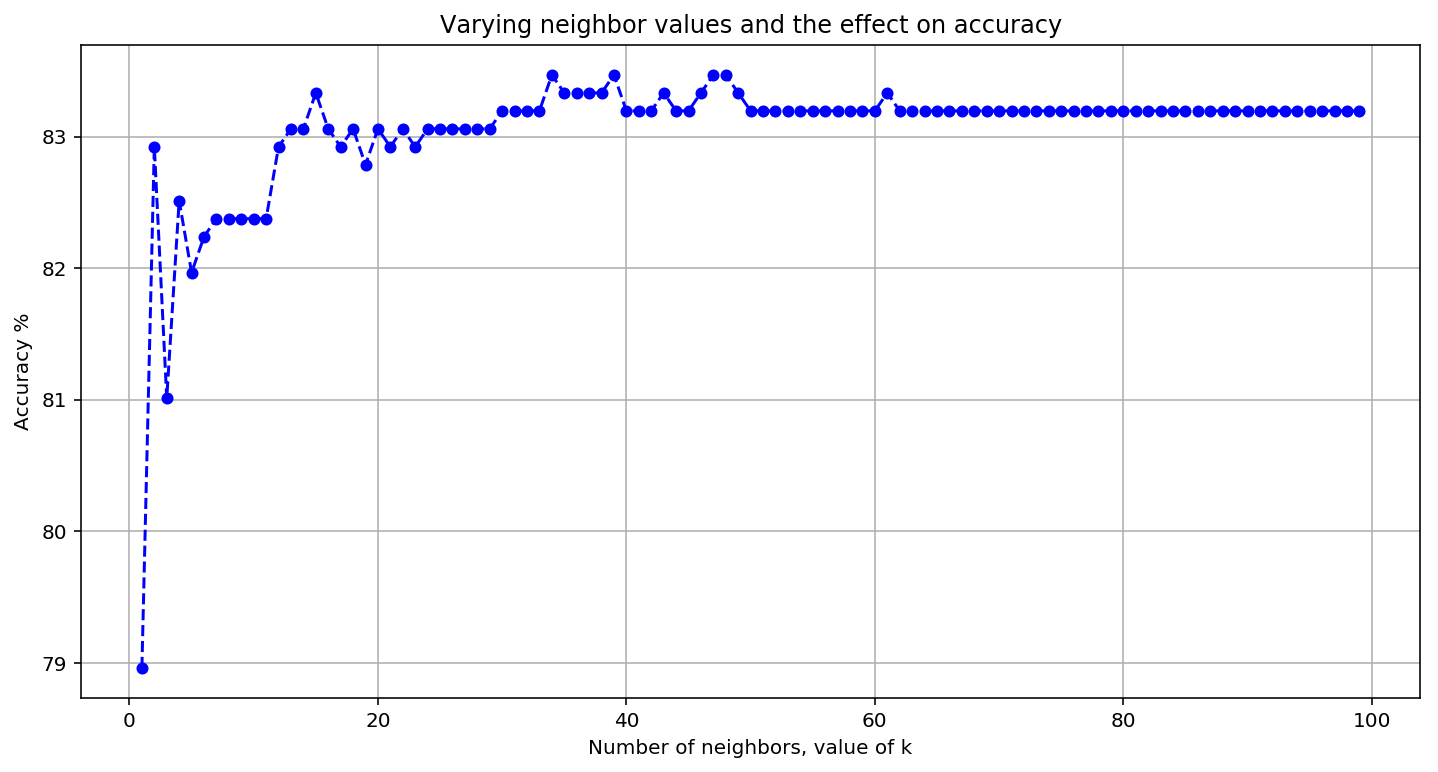

In [16]:
#plot the change of k and how this effects accuracy 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.title('Varying neighbor values and the effect on accuracy')
plt.xlabel('Number of neighbors, value of k')
plt.ylabel('Accuracy %')


value of k =16 appears to give high accuracy 

In [17]:
#valye of 16 k neighbors
features = dataset.columns #try all columns

dataset_t = chose_features(dataset, n_features=15) # choose n features
dataset_t = drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = split_data(dataset_t) # split dataset
accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=16)    


print('Accuracy {:.2f}%: '.format(accuracy*100))



Now selecting chosen features....
	 * Number of features:  15
	 * Number of dropped features:  1

Now dropping rows with missing values....
	 * Dropped 582 rows 13.7%. 3658 rows remaining

Splitting data set into 80.0% training, 20.0% test dataset....

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.85348361  0.85245902  0.85420945]
Accuracy 83.06%: 


# Measuring effect of utilising differne number of features from n =15 to n =3 


In [21]:
#using k = 16 for comparison 
features = dataset.columns #try all columns
acc=[]
for i in range (3, 16 ):
    
    dataset_t = chose_features(dataset, n_features=i) # choose n features
    dataset_t = drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = split_data(dataset_t) # split dataset
    accuracy = k_neighbors(X_train, X_test, y_train, y_test, n_neighbors=16)    
    
    acc.append(accuracy*100)
print(acc)



Now selecting chosen features....
	 * Number of features:  3
	 * Number of dropped features:  13

Now dropping rows with missing values....
	 * Dropped 388 rows 9.2%. 3852 rows remaining

Splitting data set into 80.0% training, 20.0% test dataset....

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.84922179  0.84712756  0.85185185]
Now selecting chosen features....
	 * Number of features:  4
	 * Number of dropped features:  12

Now dropping rows with missing values....
	 * Dropped 398 rows 9.4%. 3842 rows remaining

Splitting data set into 80.0% training, 20.0% test dataset....

Calculating k neighbors...


Crossvalidation score for 3 splits:

[ 0.84585366  0.84765625  0.84863281]
Now selecting chosen features....
	 * Number of features:  5
	 * Number of dropped features:  11

Now dropping rows with missing values....
	 * Dropped 423 rows 10.0%. 3817 rows remaining

Splitting data set into 80.0% training, 20.0% test dataset....

Calculating k neighbors...


Crossv

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Changing feature size and it the affect on accuracy')

Text(0.5,0,'Feature numbers')

Text(0,0.5,'Accuracy %')

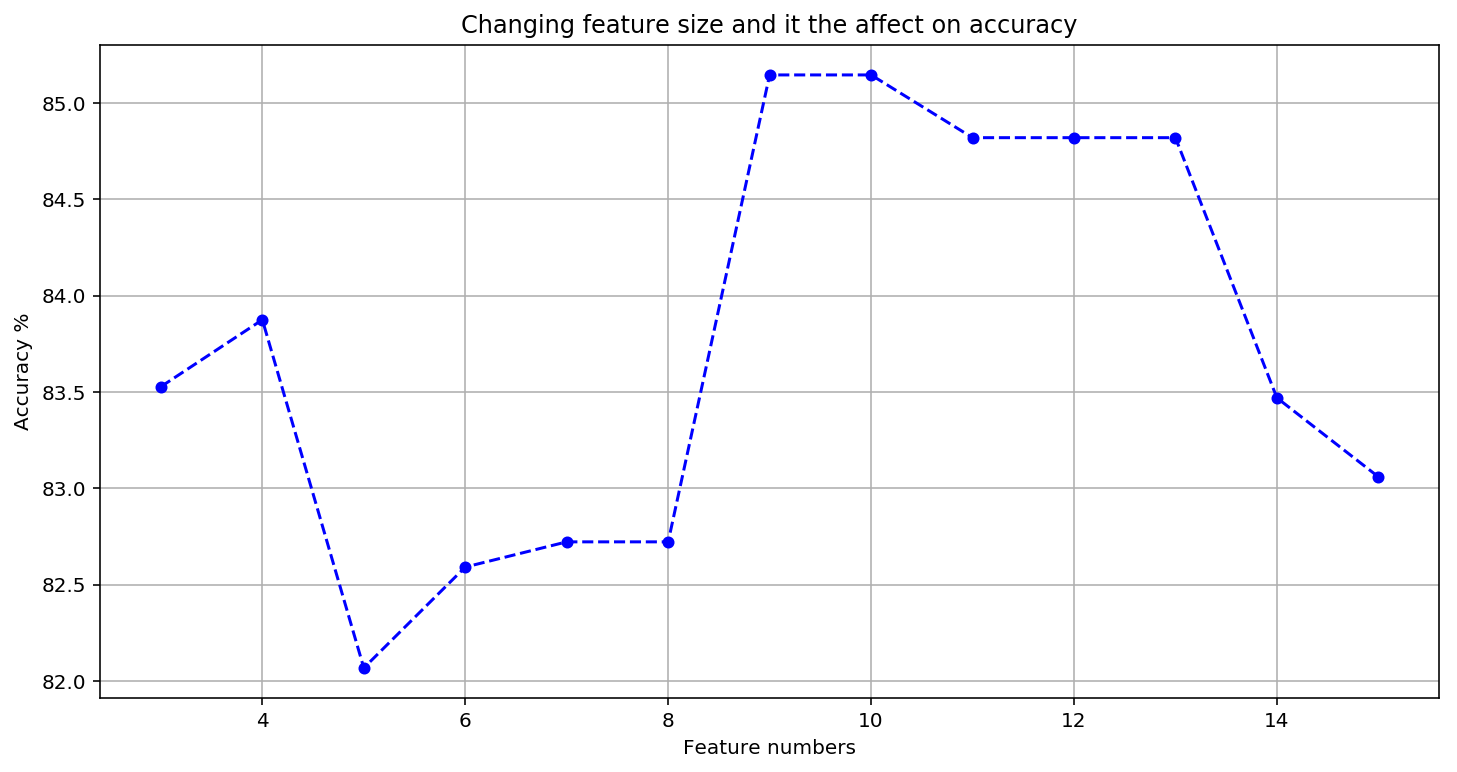

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(3,16), acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.title('Changing feature size and it the affect on accuracy')
plt.xlabel('Feature numbers')
plt.ylabel('Accuracy %')